In [69]:
import pandas as pd
import datetime as dt

df=pd.read_csv('daegu_utf8.csv',encoding='utf8')
df

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
41445,2022-06-26,143,28.4,24.4,32.8
41446,2022-06-27,143,27.3,25.4,30.1
41447,2022-06-28,143,28.9,24.8,32.3
41448,2022-06-29,143,29.5,27.7,33.7


In [70]:
df['날짜']=pd.to_datetime(df['날짜'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41450 entries, 0 to 41449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      41450 non-null  datetime64[ns]
 1   지점      41450 non-null  int64         
 2   평균기온    41450 non-null  float64       
 3   최저기온    41450 non-null  float64       
 4   최고기온    41450 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.6 MB


시작연도, 마지막연도, 달 입력: 2010 2021 12
2010년부터 2021년까지 12월의 기온 변화
12월 최저기온 평균:
[-2.5, -1.5, -3.9, -0.5, -2.8, 0.5, -0.6, -4.0, -2.3, -1.0, -3.1, -2.1]
12월 최고기온 평균:
[7.3, 6.9, 3.9, 8.1, 5.8, 9.0, 8.7, 5.8, 7.0, 9.0, 7.2, 8.9]


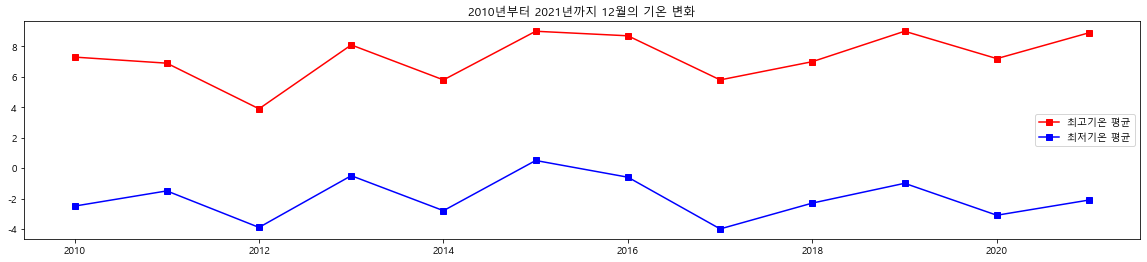

In [82]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

def draw_graph():    
    year1, year2, month = input('시작연도, 마지막연도, 달 입력: ').split()
    year1=int(year1)
    year2=int(year2)
    month=int(month)
    if year2<year1: # 연도 반대로 입력했을 경우 값 바꿔 줌
        temp=year1
        year1=year2
        year2=temp
        
    year_df=df[(df['날짜'].dt.year>=year1)&(df['날짜'].dt.year<=year2)]
    max_temp_mean=[]
    min_temp_mean=[]
    x_year=[]
    
    for i in range(1+year2-year1):
        month_df=year_df[(year_df['날짜'].dt.month==month)&(year_df['날짜'].dt.year==year1+i)]
        x_year.append(year1+i)
        max_temp_mean.append(round(month_df['최고기온'].mean(),1))
        min_temp_mean.append(round(month_df['최저기온'].mean(),1))
   
    if platform.system() == 'Windows':
        font_name = fm.FontProperties(fname='c:\Windows\Fonts\malgun.ttf').get_name()
        plt.rc('font', family=font_name)
        # plt.rc(‘font’, family=‘Malgun Gothic’, size=8) # 간단히 맑은 고딕으로 설정
    else:
        # MacOS
        plt.rc('font', family='AppleGothic', size=8) # 한글 폰트 사용 For Mac OS
        
    print('{}년부터 {}년까지 {}월의 기온 변화'.format(year1,year2,month))
    print('{}월 최저기온 평균:\n{}'.format(month,min_temp_mean))
    print('{}월 최고기온 평균:\n{}'.format(month,max_temp_mean))
    
    plt.figure(figsize=(20,4))
    plt.title('{}년부터 {}년까지 {}월의 기온 변화'.format(year1,year2,month))
    plt.rcParams['axes.unicode_minus']=False
    plt.plot(x_year,max_temp_mean,'r',marker='s',label='최고기온 평균')
    plt.plot(x_year,min_temp_mean,'b',marker='s',label='최저기온 평균')
    plt.legend()
    plt.show()
    
draw_graph()